## Perceptron Learning Algorithm - Implementation

### Objectives:
- Create a Perceptron Class and implement basic initialization and fit methods
- Using Iris Dataset, verify the working of the Perceptron



In [99]:
import numpy as np

### Perceptron Class
#### Parameters
- **eta** - Learning Rate
- **n_iter** - number of iterations over training dataset
- **random_state** - random seed generator for random weight

#### Attributes
- **w_** - Array of weights
- **errors_** - number of misclassifications

In [100]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    """
    fit - a method to adjust the randomly generated weights based on the data.
            In other words - training the model
    """
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0,
                              scale = 0.01,
                              size = X.shape[1] + 1)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update # Bias weight
                errors += int(update != 0.0)
            self.errors_.append(errors)
        
        return self

    """ net_input - compute the dot product between the weights and the input values """
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    """ predict - a funciton that returns the label based on the result of net_input """
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [101]:
import pandas as pd

df = pd.read_csv('Datasets/Iris DataSet/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


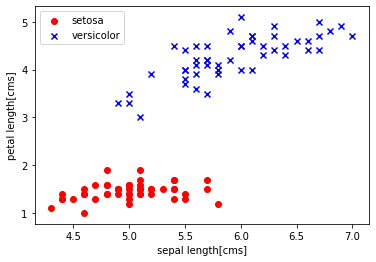

In [103]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Seperate the 'y'(label) values from the data set
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract the input variables from the dataset, in this case- we are going to proceed based on sepal and petal lengths
# extract sepal and petal lengths
X = df.iloc[0:100, [0, 2]].values

# plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length[cms]')
plt.ylabel('petal length[cms]')

plt.legend(loc='upper left')
plt.show()

Text(0, 0.5, 'Number of updates')

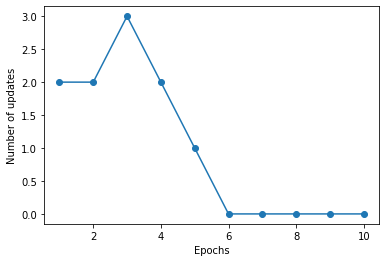

In [104]:
# Create a Perceptron object
# Feed the perceptron with the input data and the corresponding label to adjust the weights for better prediction
ppn = Perceptron(eta=0.01, n_iter=10, random_state=123)
ppn.fit(X, y)

# Plot the errors during the training iterations
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_,
        marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

By the 6th iteration, The Perceptron adjusted its weights to fit the given training data set

In [105]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
        

**Note**
Marker Symbols for respective values:
- s: Square
- x: X
- o: oval
- ^: Triagle facing upwards
- v: Bottom facing triangle

**contourf** builds a colored contour map


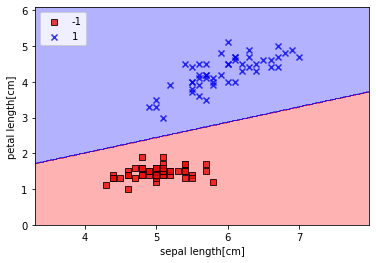

In [98]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()